complete the code wherever we used #----start       #----end

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
import scipy
import skimage

Part A

In [2]:
# here we got an image with size of 8*8 #
imagee =np.array([[ 33.90241005,  30.54775832,  27.97959216,  29.41620856,
         33.24129806,  35.02424581,  32.94586615,  29.93754577],
       [ 34.69138758,  42.05585559,  50.00845073,  52.39975944,
         49.87770263,  47.92905119,  49.74401583,  52.76852369],
       [ 31.77462629,  49.6598556 ,  69.28626278,  75.85118649,
         70.55222279,  66.14976936,  70.26596303,  77.1838152 ],
       [ 28.6068495 ,  47.44677111,  71.24679329,  85.75392986,
         88.52192546,  87.37539338,  89.03778505,  92.22403802],
       [ 32.34196256,  44.83473787,  65.85785317,  88.43194903,
        105.17498572, 112.09541293, 110.98089772, 107.82000439],
       [ 38.13783369,  46.89900981,  65.4683231 ,  91.29834031,
        116.1083363 , 130.97097637, 134.03007616, 131.82387514],
       [ 35.16966279,  47.82418321,  68.69472555,  92.07094076,
        114.10402987, 133.14028493, 147.87319677, 156.18775704],
       [ 26.92228824,  45.6096369 ,  70.37352354,  90.01813956,
        105.70408236, 125.69502973, 150.94870287, 169.98238288]])
imagee.shape

(8, 8)

In [3]:
# Matrix Quantization #
Z = np.array([[16,11,10,16,24,40,51,61],
              [12,12,14,19,26,58,60,55],
              [14,13,16,24,40,57,69,56],
              [14,17,22,29,51,87,80,62],
              [18,22,37,56,68,109,103,77],
              [24,35,55,64,81,104,113,92],
              [49,64,78,87,103,121,120,101],
              [72,92,95,98,112,100,130,99]])

In [4]:
# zigzag for generating vector from matrix and vice versa #
zigzag = [   
      [0, 1, 5, 6, 14, 15, 27, 28],
      [2, 4, 7, 13, 16, 26, 29, 42],
      [3, 8, 12, 17, 25, 30, 41, 43],
      [9, 11, 18, 24, 31, 40, 44, 53],
      [10, 19, 23, 32, 39, 45, 52, 54],
      [20, 22, 33, 38, 46, 51, 55, 60],
      [21, 34, 37, 47, 50, 56, 59, 61],
      [35, 36, 48, 49, 57, 58, 62, 63],
  ]

In [5]:
#### in this cell, show us the image in grayscale ####
#----start
def imshoww(image):
  plt.imshow(image,cmap='gray', vmin=0, vmax=255)
#----end

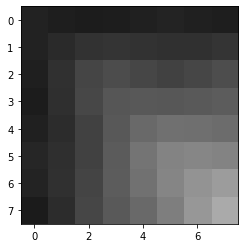

In [6]:
imshoww(imagee)

In [7]:
#### Define JPEG compression Function #####
def jpeg_compression(image,Z):
    #----start
    im = image - 128
    T = scipy.fftpack.dct(im,norm='ortho',axis = 0)
    T_dot = scipy.fftpack.dct(T,norm='ortho',axis = 1)
    T_hat = np.round(T_dot/Z)
    #----end
    return T_hat

In [8]:
jpeg_matrix = jpeg_compression(imagee,Z)

In [9]:
"""change the jpeg_matrix to a vector, like 
a = [-27, -17, -15, -3, 11, -4, -1, 0, 0, -1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 'EOB']"""
####define a mat_2_vec function####
def mat_2_vec(jpeg_matrix,zigzag):
    #----start
    vec = np.zeros((jpeg_matrix.shape[0]*jpeg_matrix.shape[1]))
    for i in range(jpeg_matrix.shape[0]):
        for j in range(jpeg_matrix.shape[1]):
            index = zigzag[i][j]
            vec[index] = jpeg_matrix[i,j]
    vec = np.trim_zeros(vec,"b")
    vec = vec.tolist()
    vec.append("EOB")

    #----end
    return vec

In [10]:
vec = mat_2_vec(jpeg_matrix,zigzag)

Part B

In [11]:
#### in this cell,show the vector we got in part A ###
#start
vect = np.array(vec)
vect
#End

array(['-27.0', '-17.0', '-15.0', '-3.0', '11.0', '-4.0', '-1.0', '-0.0',
       '-0.0', '-1.0', '-1.0', '0.0', '2.0', '0.0', '0.0', '0.0', '0.0',
       '-0.0', '0.0', '0.0', '-0.0', '-0.0', '-0.0', '-0.0', '1.0', 'EOB'],
      dtype='<U32')

In [12]:
####define a vec_2_mat function####
def vector_to_matrix(vector1):
  #----start
  vector = [0] * 64
  vector[0:len(vec)-1] = vector1[0:len(vec)-1]
  zigzag = [   
      [0, 1, 5, 6, 14, 15, 27, 28],
      [2, 4, 7, 13, 16, 26, 29, 42],
      [3, 8, 12, 17, 25, 30, 41, 43],
      [9, 11, 18, 24, 31, 40, 44, 53],
      [10, 19, 23, 32, 39, 45, 52, 54],
      [20, 22, 33, 38, 46, 51, 55, 60],
      [21, 34, 37, 47, 50, 56, 59, 61],
      [35, 36, 48, 49, 57, 58, 62, 63],
  ]
  for i in range(8):
    for j in range(8):
      zigzag[i][j] = vector[zigzag[i][j]]
  
  return zigzag


In [13]:
#### Define JPEG Decompression Function #####
def jpeg_decompress(T_hat, Z):
  #----start
  # Please set norm='ortho' in Discrete Cosine Transform Function in fftpack
  # you can use scipy.fftpack for dct and idct
  T_dot = np.multiply(T_hat,Z)
  T = scipy.fftpack.idct(T_dot,norm='ortho',axis = 1)
  T = scipy.fftpack.idct(T,norm='ortho',axis = 0)
  T = np.array(T)
  T = T + 128
  # Please set norm='ortho' in Discrete Cosine Transform Function in fftpack
 
  return T
  #----end

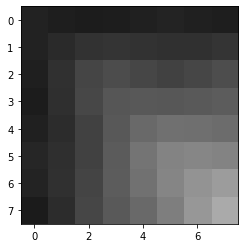

In [14]:
####  Decompress Vector the vector and show the image  ####
T_hat = vector_to_matrix(vec)
image= jpeg_decompress(T_hat, Z)
imshoww(image)

Part C

In [15]:
''' in this cell,caculate 3 following metrics using our original image(first cell of part A) and
 our final image in part B(last cell of part B)'''
#----start

mse = skimage.metrics.mean_squared_error(image,imagee)
PSNR = skimage.metrics.peak_signal_noise_ratio(imagee, image,data_range=256)
SSIM = skimage.metrics.structural_similarity(imagee, image)
####print them all####
print(mse,PSNR,SSIM)
#----end

9.05436937965006e-18 218.59621722740644 1.0000000000000002
